In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import pickle

# import warnings
# %matplotlib inline
# warnings.filterwarnings('ignore')

### Loading the dataset

In [31]:
df = pd.read_csv('G:\Project\Wine Quality Predictor\winequality.csv')
df.head()
df.shape

(6497, 13)

#### Statistical info

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Filling Missing Values

In [5]:
#Checking Missing values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
# fill the missing values of the columns with the mean value of the column 
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Exploratory Data Analysis


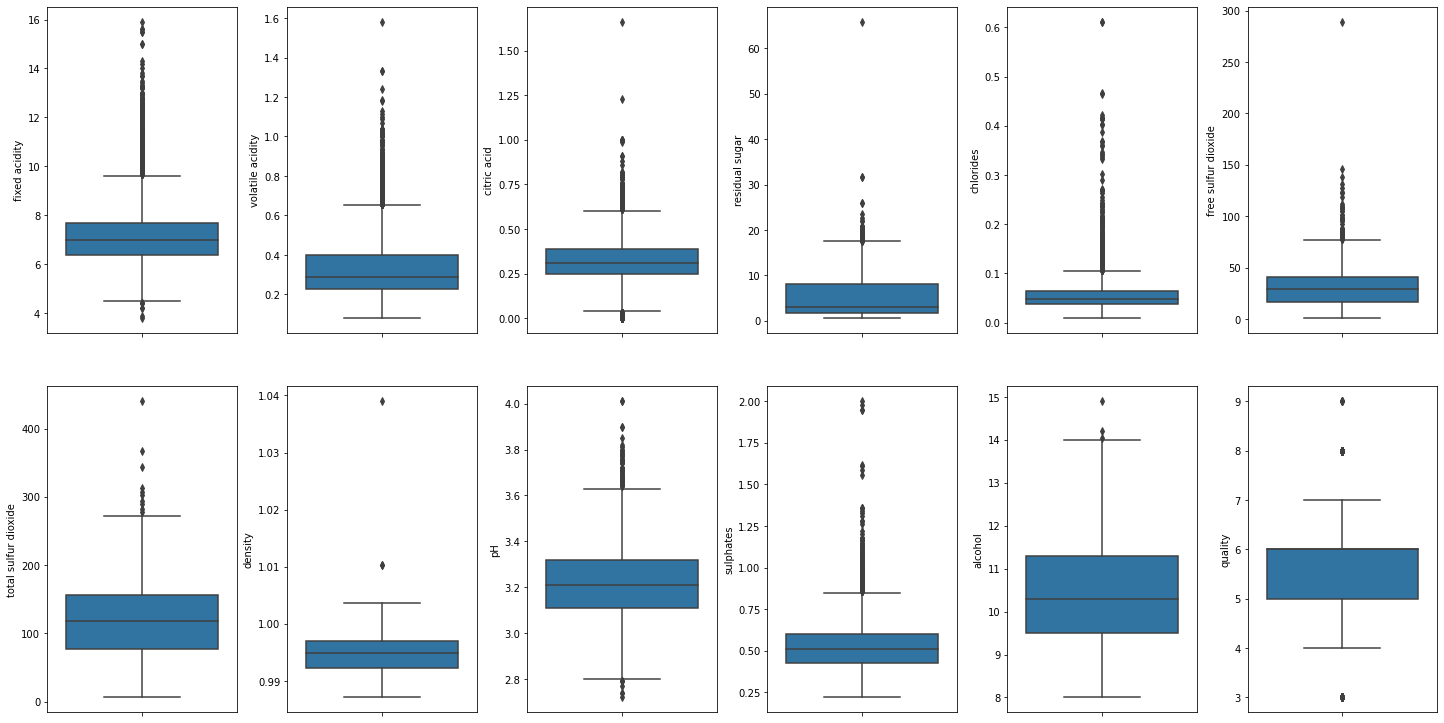

In [8]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


c:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

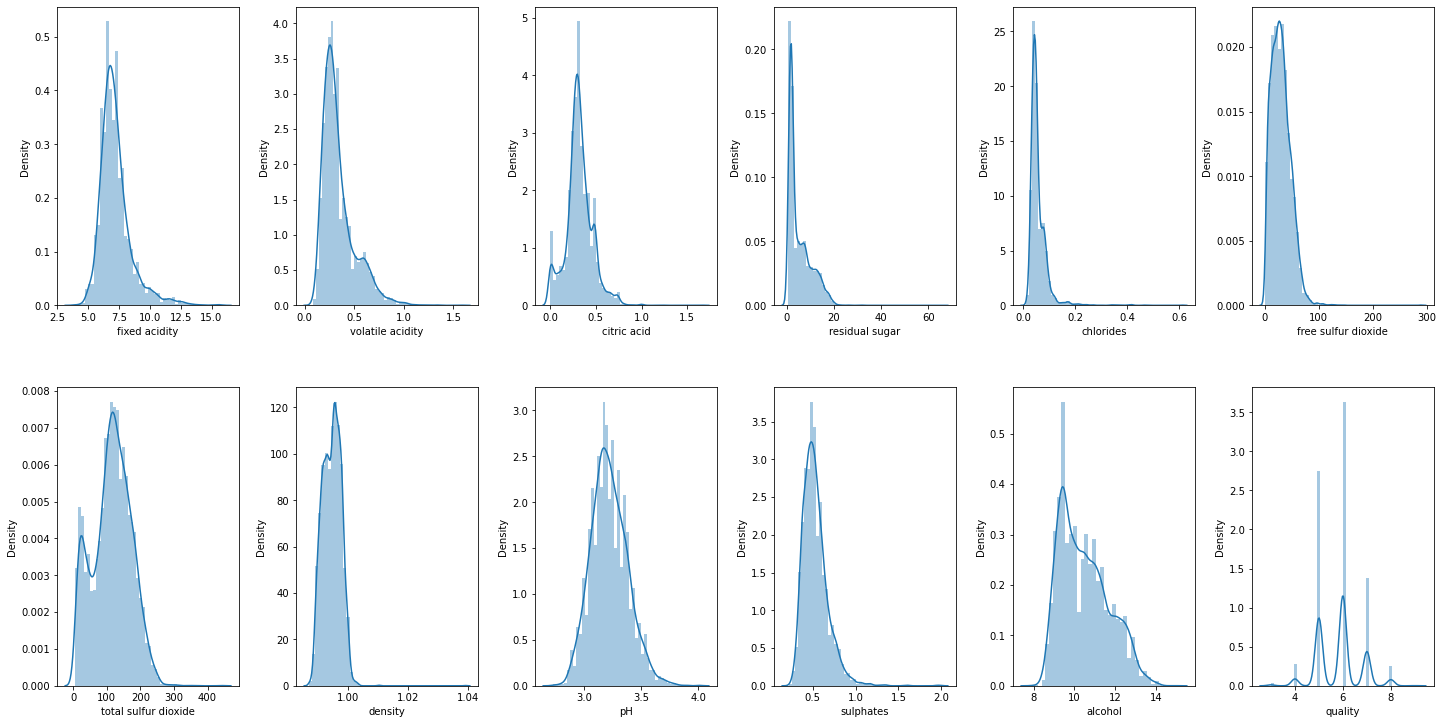

In [9]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

c:\Users\sudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

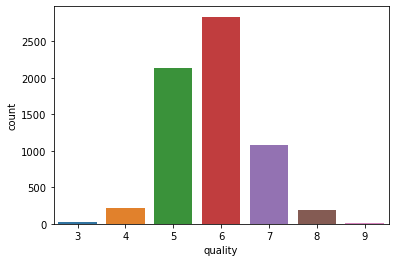

In [10]:
sns.countplot(df['quality'])

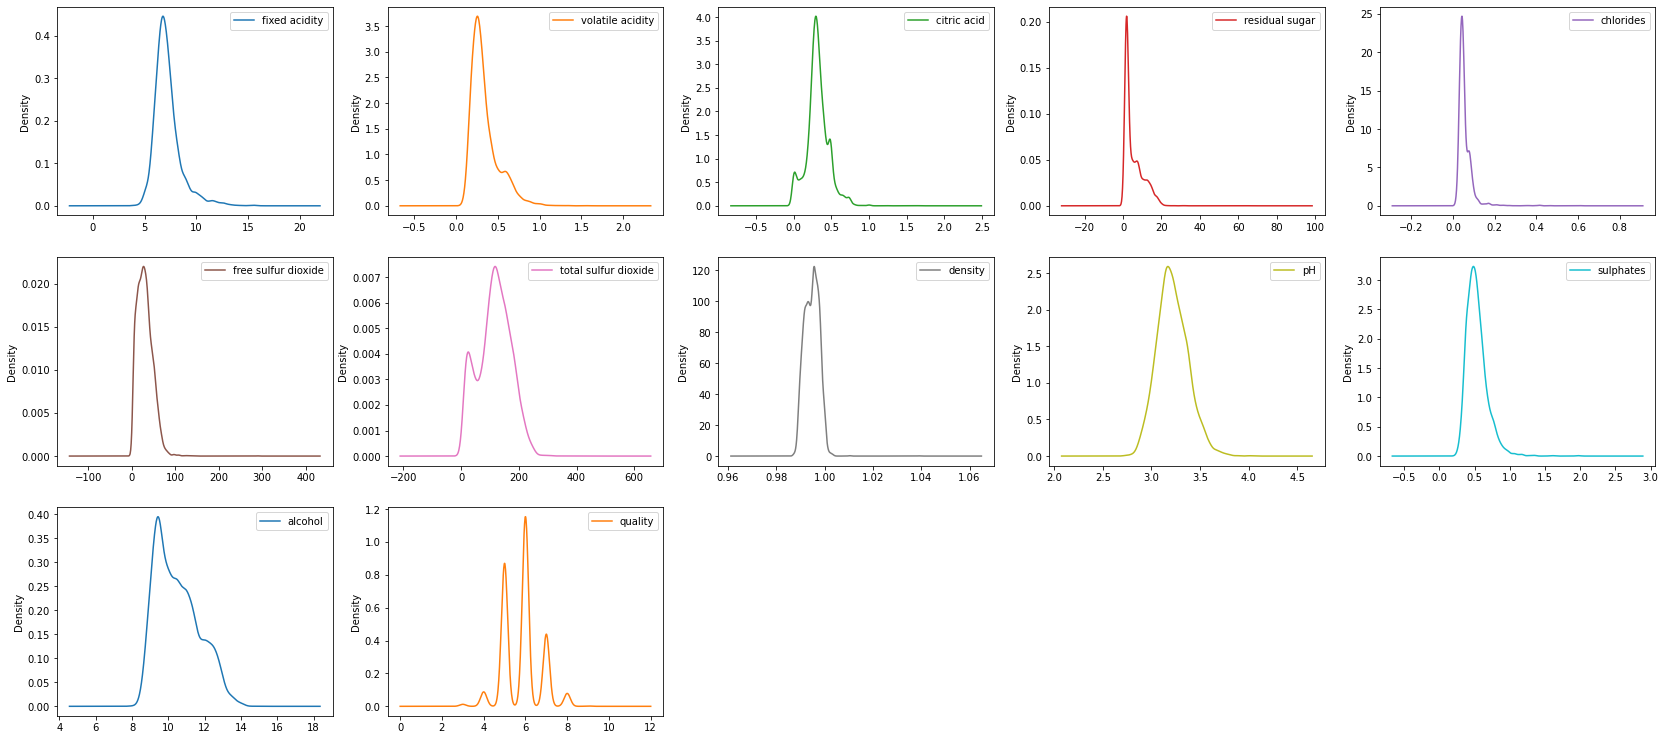

In [11]:
#Creating Density Plot
df.plot(kind="density",subplots=True,layout=(5,5),sharex=False)
plt.subplots_adjust(left=0.3,right=4,top=4.5,bottom=0.3)
plt.show()

### Diminishing the Dimensions with PCA

In [12]:
y = df.pop('quality')
print(y)
df.head()

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [13]:
df=df.drop(columns=['type'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


In [14]:
#Scaling of data 
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.167159,-0.423564,0.284245,3.206977,-0.315222,0.815565,0.959976,2.102214,-1.359665,-5.459591e-01,-1.418558
1,-0.707427,-0.241232,0.146523,-0.808136,-0.201027,-0.931107,0.287618,-0.232332,0.508045,-2.770639e-01,-0.831615
2,0.681835,-0.362786,0.559689,0.306005,-0.172479,-0.029599,-0.331660,0.134525,0.259017,-6.131829e-01,-0.328521
3,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-8.820781e-01,-0.496219
4,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-8.820781e-01,-0.496219
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784609,1.582089,-1.643863,-0.724050,0.969467,0.083090,-1.269422,0.067824,1.441900,3.279502e-01,0.006875
6493,-1.016152,1.278203,-1.506141,-0.682007,0.170105,0.477500,-1.145567,0.141195,1.877699,9.702343e-15,0.593818
6494,-0.707427,1.035093,-1.299558,-0.660986,0.569786,-0.085943,-1.340197,0.347969,1.255129,1.470755e+00,0.426120
6495,-1.016152,1.855587,-1.368419,-0.724050,0.541237,0.083090,-1.269422,0.257923,2.188984,1.201860e+00,-0.244672


In [15]:
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-1.381738e-15,3.086397e-15,2.119284e-16,-4.138345e-16,2.648763e-16,-5.712086e-16,-8.278911e-16,-3.146646e-15,-3.195638e-15,-1.220323e-15,-1.427842e-15
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.636958e+00,-1.578333e+00,-2.194751e+00,-1.018352e+00,-1.342973e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.102860e+00,-2.092106e+00,-2.089350e+00
25%,-6.302460e-01,-6.666730e-01,-4.732259e-01,-7.660934e-01,-5.150623e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748377e-01,-6.804067e-01,-8.316152e-01
50%,-1.671586e-01,-3.020089e-01,-6.005986e-02,-5.138350e-01,-2.581246e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.226785e-02,-1.426163e-01,-1.608231e-01
75%,3.731101e-01,3.665421e-01,4.908282e-01,5.582634e-01,2.557510e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.325590e-01,4.623978e-01,6.776670e-01
max,6.701972e+00,7.538271e+00,9.236175e+00,1.268769e+01,1.584331e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.928291e+00,9.873729e+00,3.696231e+00


In [16]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9,10
0,2.776292,3.044961,-0.664775,-1.148299,0.761395,0.382765,0.762740,0.839355,0.101126,-0.262795,0.073242
1,-0.128992,-0.492344,-0.344203,-0.016423,-0.076901,-1.383943,0.061230,-0.333573,-0.875605,0.329976,0.118931
2,0.193624,0.378129,0.458876,-0.388639,0.531295,-0.561894,-0.535902,-0.040935,0.358402,-0.143004,-0.367811
3,1.807008,0.590898,-0.322747,-0.071318,-0.312084,-0.162902,-0.404762,-0.102270,0.421100,0.463024,0.001646
4,1.807008,0.590898,-0.322747,-0.071318,-0.312084,-0.162902,-0.404762,-0.102270,0.421100,0.463024,0.001646
...,...,...,...,...,...,...,...,...,...,...,...
6492,-2.192623,-0.543726,-2.215464,0.289755,-0.559173,0.173403,-0.254289,0.182947,0.375669,-0.643232,0.058368
6493,-1.587488,-1.191105,-2.281690,0.422790,0.158187,0.312644,-0.631531,0.136282,0.542658,-0.756246,0.370489
6494,-2.272433,-0.425760,-1.556244,0.979174,0.138429,0.466519,0.520271,0.072396,0.261769,-0.658542,0.355103
6495,-2.476467,-0.394374,-2.606500,1.069003,0.137789,0.175254,-0.212474,-0.046506,-0.206360,-0.883332,-0.038359


Text(0, 0.5, 'Explained Varience')

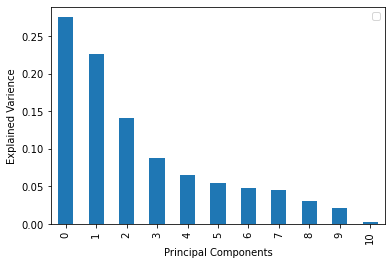

In [17]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

The first 5 Principal Components are capturing around 80% of the variance so we can replace the 11 original features (acidity, residual sugar, chlorides, etc.) with the new 5 features having 80% of the information. So, we have reduced the 11 dimensions to only 5 dimensions while retaining most of the information.

In [18]:
X=df_scaled.iloc[:,0:5]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
0,-0.167159,-0.423564,0.284245,3.206977,-0.315222
1,-0.707427,-0.241232,0.146523,-0.808136,-0.201027
2,0.681835,-0.362786,0.559689,0.306005,-0.172479
3,-0.012796,-0.666673,0.008801,0.642350,0.055911
4,-0.012796,-0.666673,0.008801,0.642350,0.055911
...,...,...,...,...,...
6492,-0.784609,1.582089,-1.643863,-0.724050,0.969467
6493,-1.016152,1.278203,-1.506141,-0.682007,0.170105
6494,-0.707427,1.035093,-1.299558,-0.660986,0.569786
6495,-1.016152,1.855587,-1.368419,-0.724050,0.541237


## Correlational Matrix

<AxesSubplot:>

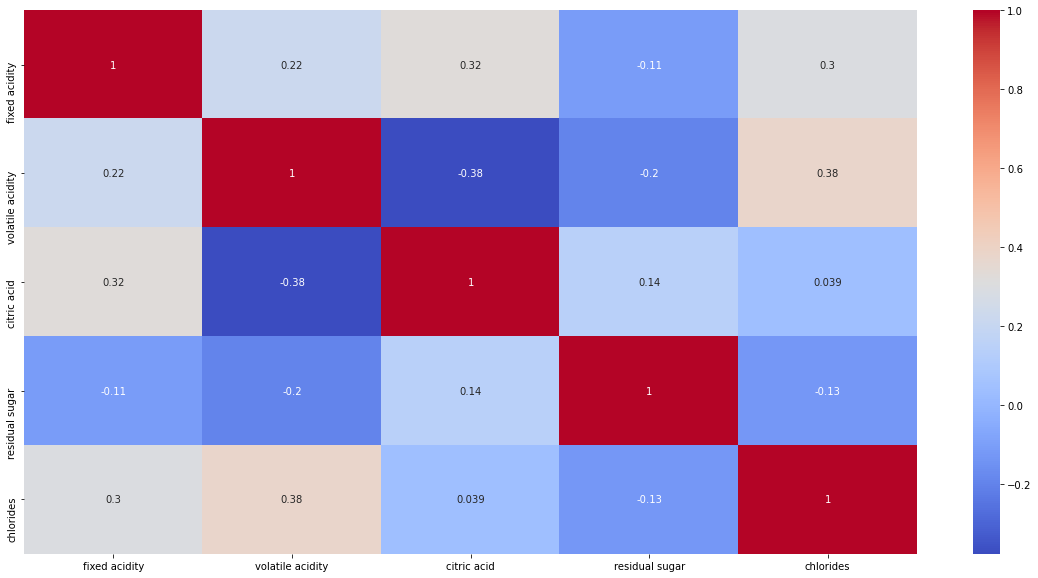

In [19]:
corr = X.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Insplit Data

In [20]:
def f(s):
    if s>=8:
        return 2
    elif s>=6.5 and s<8:
        return 1
    else:
        return 0

x = X
y = y.apply(f)



### Class Imbalanbce

In [21]:
print(y.value_counts())

oversample = SMOTE(k_neighbors=4)
# transform the dataset
x, y = oversample.fit_resample(x, y)

0    5220
1    1079
2     198
Name: quality, dtype: int64


In [22]:
y.value_counts()

0    5220
1    5220
2    5220
Name: quality, dtype: int64

## Model Training

In [23]:
# classify function
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    # train the model
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(y_pred)
    print("Accuracy:", model.score(x_test, y_test) * 100,"%")
    
    #Confusion Matrix
    k=confusion_matrix(y_test,y_pred)
    print("Confusion matrix: \n", k)
    print(classification_report(y_test,y_pred))

### Now checking on different classification on which we get best result 

In [24]:
#on logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1, x, y)

[1 2 1 ... 0 1 0]
Accuracy: 43.51851851851852 %
Confusion matrix: 
 [[529 239 244]
 [233 343 474]
 [238 341 491]]
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      1012
           1       0.37      0.33      0.35      1050
           2       0.41      0.46      0.43      1070

    accuracy                           0.44      3132
   macro avg       0.44      0.44      0.43      3132
weighted avg       0.43      0.44      0.43      3132



In [25]:
#on Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
classify(model2, x, y)

[0 1 0 ... 0 0 0]
Accuracy: 86.68582375478927 %
Confusion matrix: 
 [[ 847  118   47]
 [ 139  867   44]
 [  33   36 1001]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1012
           1       0.85      0.83      0.84      1050
           2       0.92      0.94      0.93      1070

    accuracy                           0.87      3132
   macro avg       0.87      0.87      0.87      3132
weighted avg       0.87      0.87      0.87      3132



In [26]:
#on GussianNB Classifier
from sklearn.naive_bayes import GaussianNB
model3= GaussianNB()
classify(model3, x, y)

[2 2 0 ... 0 2 0]
Accuracy: 45.242656449553 %
Confusion matrix: 
 [[386 104 522]
 [122 124 804]
 [125  38 907]]
              precision    recall  f1-score   support

           0       0.61      0.38      0.47      1012
           1       0.47      0.12      0.19      1050
           2       0.41      0.85      0.55      1070

    accuracy                           0.45      3132
   macro avg       0.49      0.45      0.40      3132
weighted avg       0.49      0.45      0.40      3132



In [27]:
# on SVM Classifier
from sklearn import svm
model4 = svm.SVC()
classify(model4, x, y)

[1 2 0 ... 0 2 2]
Accuracy: 62.899106002554284 %
Confusion matrix: 
 [[627 227 158]
 [171 543 336]
 [ 86 184 800]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1012
           1       0.57      0.52      0.54      1050
           2       0.62      0.75      0.68      1070

    accuracy                           0.63      3132
   macro avg       0.63      0.63      0.63      3132
weighted avg       0.63      0.63      0.63      3132



In [28]:
# on Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
classify(model5, x, y)

[0 1 0 ... 0 0 1]
Accuracy: 92.52873563218391 %
Confusion matrix: 
 [[ 887   93   32]
 [  77  963   10]
 [  14    8 1048]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1012
           1       0.91      0.92      0.91      1050
           2       0.96      0.98      0.97      1070

    accuracy                           0.93      3132
   macro avg       0.92      0.92      0.92      3132
weighted avg       0.92      0.93      0.92      3132



## Prediction System on input values given by any user 

In [29]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#we need only 5 attributes to predict now
required_input_data=(input_data_reshaped[0,0:5]).reshape(1,-1)
required_input_data

prediction = model5.predict(required_input_data)
print(prediction)

if (prediction==2):
    print('Excellent Quality Wine')
elif (prediction==1):
    print('Good Quality Wine')
else:
    print("Bad Quality Wine") 

[0]
Bad Quality Wine


c:\Users\sudha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
pickle.dump(model5,open('model5.pkl','wb'))